In [1]:
import pandas as pd
import numpy as np

cdc_vaccine = pd.read_csv("CDC_data.csv")
cdc_vaccine[cdc_vaccine['FIPS']=='UNK'] = np.nan
cdc_vaccine.dropna(inplace=True)
cdc_vaccine['FIPS'] = cdc_vaccine['FIPS'].astype(int)

print("CDC Vacc:",cdc_vaccine.shape,"\n",cdc_vaccine.head())

CDC Vacc: (9672, 4) 
        Recip_County   FIPS    year  total_vacc
0  Abbeville County  45001  2020.0         0.0
1  Abbeville County  45001  2021.0      9333.0
2  Abbeville County  45001  2022.0     10222.0
3     Acadia Parish  22001  2020.0         0.0
4     Acadia Parish  22001  2021.0     31412.0


In [2]:
nyt_cases = pd.read_csv("NYT_counties.csv").drop('county',axis=1)
nyt_cases.dropna(inplace=True)
nyt_cases['fips'] = nyt_cases['fips'].astype(int)
print("NYT Cases and Deaths:",nyt_cases.shape,"\n",nyt_cases.head())

NYT Cases and Deaths: (9656, 4) 
     fips  year  total_cases  total_deaths
0  45001  2020         1275            25
1  45001  2021         4282            54
2  45001  2022         6655            69
3  22001  2020         5082           153
4  22001  2021        11132           256


In [3]:
cases_vacc = pd.merge(cdc_vaccine,nyt_cases,left_on=["FIPS","year"],
                        right_on=["fips","year"]).drop('fips', axis=1)
print(cases_vacc.shape)
cases_vacc.head()

(9642, 6)


,Recip_County,FIPS,year,total_vacc,total_cases,total_deaths
0,Abbeville County,45001,2020.0,0.0,1275,25
1,Abbeville County,45001,2021.0,9333.0,4282,54
2,Abbeville County,45001,2022.0,10222.0,6655,69
3,Acadia Parish,22001,2020.0,0.0,5082,153
4,Acadia Parish,22001,2021.0,31412.0,11132,256


In [4]:
census_education = pd.read_csv("USDA_Education.csv")
#print("Census Education:",census_education.shape,"\n",census_education.head())

In [5]:
census_population = pd.read_csv("USDA_PopulationEstimates.csv").drop(['State','Area_Name'],axis=1)
#print("Census Population:",census_population.shape,"\n",census_population.head())

In [6]:
census_unemployment = pd.read_csv("USDA_Unemployment.csv").drop(['State','Area_Name'],axis=1)
#print("Census Unemployment:",census_unemployment.shape,"\n",census_unemployment.head())

In [7]:
#Using inner joins because we only lose ~12 counties
census_semi = pd.merge(census_education,census_population,
                        left_on="Federal Information Processing Standard (FIPS) Code",
                        right_on="FIPStxt").drop('FIPStxt', axis=1)
census_final = pd.merge(census_semi,census_unemployment,
                        left_on="Federal Information Processing Standard (FIPS) Code",
                        right_on="FIPS_Code").drop('FIPS_Code', axis=1)
print(census_final.shape)
census_final.head()

(3273, 40)


,Federal Information Processing Standard (FIPS) Code,State,Area name,"Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21",...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,0,US,United States,25050356.0,59636386.0,64656741.0,75808834.0,11.125960,26.487130,28.716889,...,162229903.0,153544980.0,8684923.0,5.4,164781642.0,158766998.0,6014644.0,3.7,69717.0,NaN
1,1000,AL,Alabama,430047.0,1041209.0,1032122.0,910425.0,12.597300,30.499973,30.233789,...,2259349.0,2183330.0,76019.0,3.4,2286028.0,2226670.0,59358.0,2.6,53990.0,100.0
2,1001,AL,Autauga County,4126.0,12977.0,11367.0,11144.0,10.415510,32.758621,28.694401,...,26545.0,25809.0,736.0,2.8,26789.0,26181.0,608.0,2.3,66444.0,123.1
3,1003,AL,Baldwin County,14555.0,44342.0,50518.0,52562.0,8.985844,27.375492,31.188379,...,99953.0,97034.0,2919.0,2.9,102849.0,100432.0,2417.0,2.4,65658.0,121.6
4,1005,AL,Barbour County,4378.0,6600.0,5010.0,2007.0,24.328980,36.676855,27.841067,...,8280.0,7821.0,459.0,5.5,8241.0,7906.0,335.0,4.1,38649.0,71.6


In [8]:
final_so_gross = pd.merge(cases_vacc,census_final,left_on="FIPS",
                        right_on="Federal Information Processing Standard (FIPS) Code").drop('Area name', axis=1)
print(final_so_gross.shape)
final_so_gross.head()

(9627, 45)


,Recip_County,FIPS,year,total_vacc,total_cases,total_deaths,Federal Information Processing Standard (FIPS) Code,State,"Less than a high school diploma, 2017-21","High school diploma only, 2017-21",...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,Abbeville County,45001,2020.0,0.0,1275,25,45001,SC,2790.0,6331.0,...,9576.0,9144.0,432.0,4.5,9433.0,9068.0,365.0,3.9,49485.0,83.2
1,Abbeville County,45001,2021.0,9333.0,4282,54,45001,SC,2790.0,6331.0,...,9576.0,9144.0,432.0,4.5,9433.0,9068.0,365.0,3.9,49485.0,83.2
2,Abbeville County,45001,2022.0,10222.0,6655,69,45001,SC,2790.0,6331.0,...,9576.0,9144.0,432.0,4.5,9433.0,9068.0,365.0,3.9,49485.0,83.2
3,Acadia Parish,22001,2020.0,0.0,5082,153,22001,LA,7546.0,16454.0,...,23627.0,22420.0,1207.0,5.1,23943.0,23069.0,874.0,3.7,44648.0,85.7
4,Acadia Parish,22001,2021.0,31412.0,11132,256,22001,LA,7546.0,16454.0,...,23627.0,22420.0,1207.0,5.1,23943.0,23069.0,874.0,3.7,44648.0,85.7


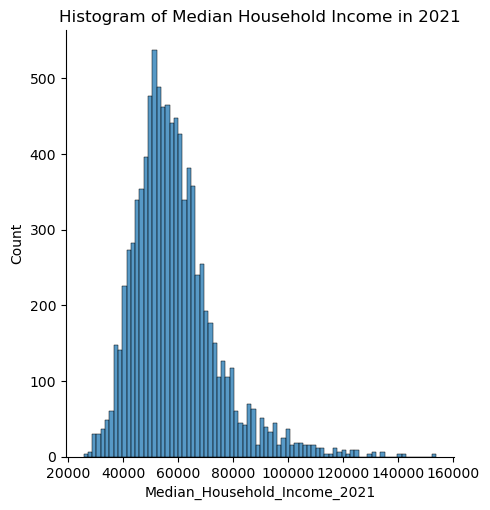

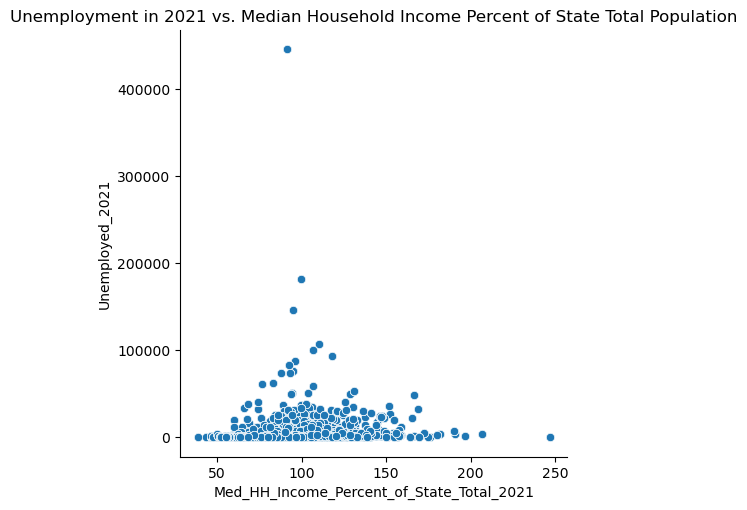

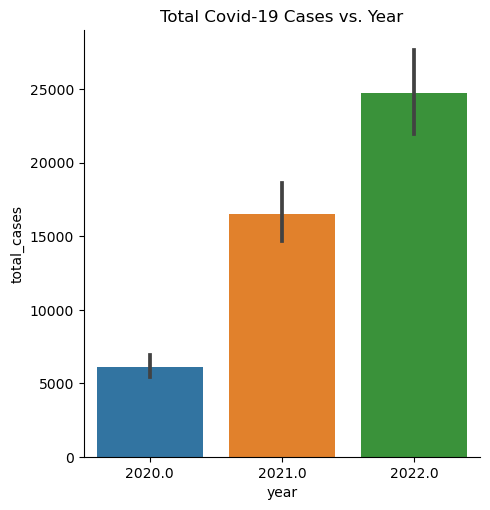

In [9]:
import seaborn as sns

#employed 2022 and total cases
sns.displot(data = final_so_gross, x = "Median_Household_Income_2021").set(title = "Histogram of Median Household Income in 2021")

#unemployment 2021 and median household income
sns.relplot(data = final_so_gross, kind = 'scatter', x = "Med_HH_Income_Percent_of_State_Total_2021", y = "Unemployed_2021").set(title = "Unemployment in 2021 vs. Median Household Income Percent of State Total Population")

#median household income by year
sns.catplot(data = final_so_gross, kind = 'bar', x = "year", y = "total_cases").set(title = "Total Covid-19 Cases vs. Year")